# iZcyBurningForest
## Config Initialization

In [140]:
%pip install matplotlib
# also do: sudo apt-get install ffmpeg

Note: you may need to restart the kernel to use updated packages.


## Initialize Packages

In [141]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *
from random import *
import time

matplotlib.rc('animation', html='html5')
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

## Cleaning .mp4

In [142]:
import os

def delete_mp4_files(directory):
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Check if the file ends with '.mp4'
        if filename.endswith(".mp4"):
            # Construct the full path to the file
            file_path = os.path.join(directory, filename)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")

# Get the current directory
current_directory = os.getcwd()

# Call the function to delete .mp4 files in the current directory
delete_mp4_files(current_directory)


Deleted: /home/izcy/Desktop/UGM/TPS/Fire.mp4
Deleted: /home/izcy/Desktop/UGM/TPS/Fire 1715562290.mp4
Deleted: /home/izcy/Desktop/UGM/TPS/Fire 1715562387.mp4
Deleted: /home/izcy/Desktop/UGM/TPS/Fire 1715562283.mp4
Deleted: /home/izcy/Desktop/UGM/TPS/Fire 1715562004.mp4
Deleted: /home/izcy/Desktop/UGM/TPS/Fire 1715562639.mp4


## Defining States

In [143]:
## Define States
global EMPTY, TREE, BURNING, BURNING_MAX
EMPTY = 0
TREE = 1
BURNING = 2
BURNING_MAX = 3

global grid_ani

## Colouring

In [144]:
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] >= BURNING and grid[i, j] <= BURNING_MAX):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1
    return colorGrid

## Drawing

In [145]:
def drawing(grids, save=False):
    # Execute
    fig = plt.figure()
    plt.axis('off')
    im = plt.imshow(makeColorGrid(grids[0,:,:]), animated=True)

    # The animation function: called to produce a frame for each generation.
    def updatefig(i, *args):
        im.set_array(makeColorGrid(grids[i,:,:]))
        return im

    global grid_ani
    grid_ani = animation.FuncAnimation(
        fig, updatefig, save_count = len(grids), interval=500, blit=False)
    plt.show()

    # Get current time in seconds since the epoch
    current_time = int(time.time())

    # To save the animation, use the command, placed before HTML:
    if save:
        grid_ani.save(f'Fire {current_time}.mp4', writer=writer)

## Initialize the Forest

In [146]:
def initForest(n):
    forest = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            forest[i, j] = TREE
    return forest

## Burn the Forest into Grids

In [158]:
def burningForest(forest_span, t, fireProbability, save=False):
    n = forest_span
    init = initForest(n)

    forest = np.zeros((t + 1, n, n))
    forest[0, :, :] = init

    # Burn the center
    forest[0, n // 2, n // 2] = BURNING

    # Count the trees
    before_trees = np.sum(forest[0, :, :] == TREE)
    # print(f"Before trees: {before_trees}")

    for time in range(1, t + 1):
        forest[time, :, :] = forest[time - 1, :, :].copy()
        # Count the trees
        # print(f"Trees at time {time}: {np.sum(forest[time, :, :] == TREE)}")
        
        for i in range(0, n):
            for j in range(0, n):
                if (forest[time - 1, i, j] >= BURNING and forest[time - 1, i, j] < BURNING_MAX):
                    forest[time, i, j] = forest[time - 1, i, j] + 1
                if (forest[time, i, j] == TREE):
                    # Define North, South, West, East
                    north = forest[time - 1, i - 1, j]
                    south = forest[time - 1, i + 1, j]
                    west = forest[time - 1, i, j - 1]
                    east = forest[time - 1, i, j + 1]

                    # Burn with probability if there is a burning tree
                    if (north == BURNING or south == BURNING or west == BURNING or east == BURNING):
                        if (random() < fireProbability):
                            forest[time, i, j] = BURNING
                if (forest[time - 1, i, j] >= BURNING_MAX):
                    forest[time, i, j] = EMPTY
    
    # Draw
    drawing(grids=forest, save=save)

    # Count the remaining trees
    after_trees = np.sum(forest[t, :, :] == TREE)
    # print(f"After trees: {after_trees}")

    # Count the percentage of trees burned
    burned_percentage = (before_trees - after_trees) / before_trees * 100
    # Percentage max 2 decimals
    burned_percentage = round(burned_percentage, 2)
    # return forest

## Initialize Size and Time

In [148]:
# Initialize the Forest
n = 17
t = 8
x = 1


## Calculate Each Probabilty

In [149]:
# Run the Simulation
# ptg = burningForestRepeat(forest_span=n, t=t, fireProbability=0.1, x=x)
# # grid_ani = drawing(grids)
# # HTML(grid_ani.to_html5_video())
# print(f"Percentage: {ptg}")

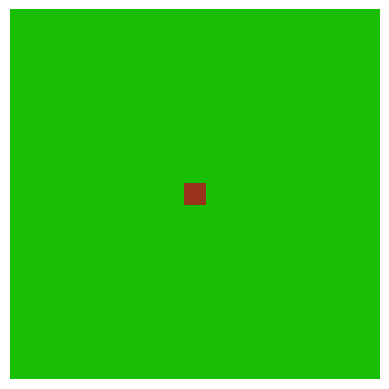

In [160]:
# Run the Simulation
burningForest(forest_span=n, t=t, fireProbability=1, save=True)
HTML(grid_ani.to_html5_video())
# print(f"Percentage: {ptg}")

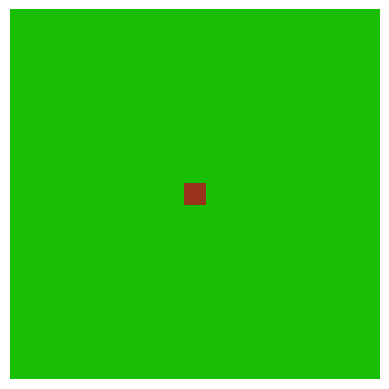

Percentage: None


In [159]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.3)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")

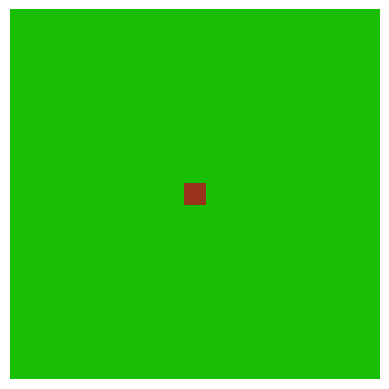

Percentage: 45.49


In [ ]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.4)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")

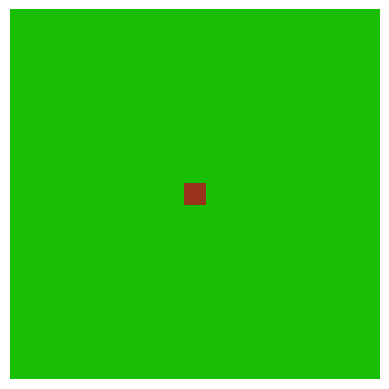

Percentage: 53.82


In [ ]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.5)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")

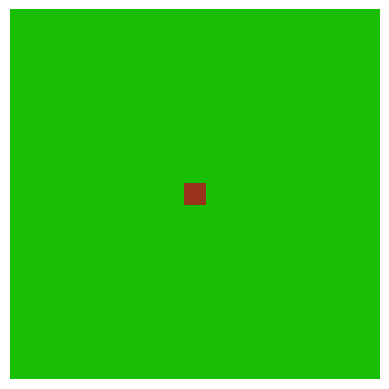

Percentage: 70.49


In [ ]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.6)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")

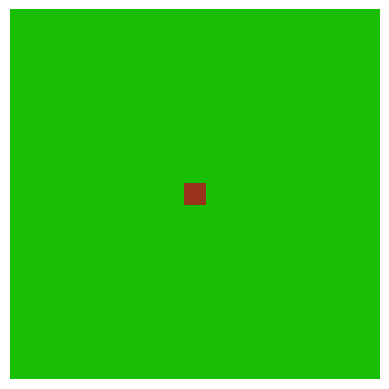

Percentage: 80.21


In [ ]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.7)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")

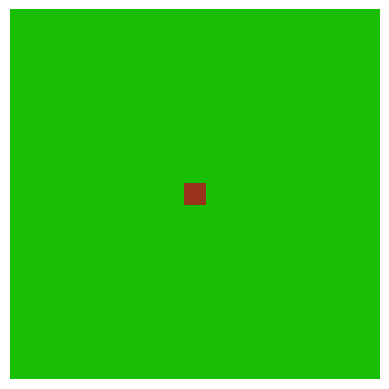

Percentage: 78.12


In [ ]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.8)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")

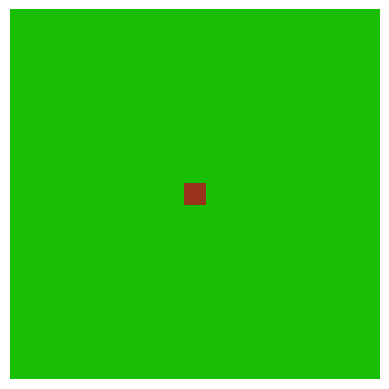

Percentage: 82.99


In [ ]:
# Run the Simulation
ptg = burningForest(forest_span=n, t=t, fireProbability=0.9)
HTML(grid_ani.to_html5_video())
print(f"Percentage: {ptg}")